# Homework 8: Variable Selection

The beginning is almost always identical - load dependent libraries, build functions that will be used throughout the proejct.

In [1]:
# Dependencies
if (!require("glmnet")) install.packages("glmnet") 
if (!require("MASS")) install.packages("MASS") 
if (!require("caret")) install.packages("caret") 

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: MASS
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [2]:
# Calculate R^2 value of regression model
get_r2 <- function(yhat, y){
    
    SSres <- sum((yhat-y)^2)
    SStot <- sum((y-mean(y))^2)
    R2 <- 1-SSres/SStot
    return(R2)
}

# Calculate the Adjusted R^2 value of a regression model
get_r2adj <- function(r2, n, p) {
    
    adj <- r2 - (1-r2)*(p/ (n-p-1))
    return(adj)
}

## 11.1 REGRESSION MODELING

In [3]:
# Read in data
uscrime <- read.table('uscrime.txt', stringsAsFactors=FALSE, header=TRUE)
set.seed(7)

In [4]:
# Prepare data
x <- as.matrix(uscrime[,-16])
y <- as.double(as.matrix(uscrime[,16]))
scale.x <- scale(x)
scale.y <- scale(y)

### a.) STEPWISE REGRESSION

__Model Building__

Let us try a fun way to explore Stepwise Regression - trying all of the possibilities and comparing what happens. The AIC criterion looks at a variable and decides if it is worthy or not, going either forward, backward, or both.

In [5]:
# Build base model using all features
lm1 <- lm(Crime~.,
         data=uscrime)

In [6]:
# Build stepAIC models
stepBack <- stepAIC(lm1, direction='backward', trace=FALSE)
stepForward <- stepAIC(lm1, direction='forward', trace=FALSE)
stepBoth <- stepAIC(lm1, direction='both', trace=FALSE)

In [7]:
# Get predictions
back.pred <- predict(stepBack, uscrime[,-16])
forward.pred <- predict(stepForward, uscrime[,-16])
both.pred <- predict(stepBoth, uscrime[,-16])

__Model Analysis__

In [8]:
# Get r^2 values
print(c('R^2', 'Adj R^2'))
print(c(get_r2(back.pred, y), summary(stepBack)$adj))
print(c(get_r2(forward.pred, y), summary(stepForward)$adj))
print(c(get_r2(both.pred, y), summary(stepBoth)$adj))

[1] "R^2"     "Adj R^2"
[1] 0.7888268 0.7443692
[1] 0.8030868 0.7078062
[1] 0.7888268 0.7443692


So, we already have a few things to discuss after creating the basic stepAIC models.  
  
First, the backwards and stepwise (both) models have equivalent R values. If we look further into this, as shown below, we see that the models are also identical. This is probably because we have such a small data set - the alternating stepwise model 'coincidentally' decided at each part of the process to have the make decision as the backwards model.
  
Second, we see that the forward model has a larger R^2 and a smaller R^2 adjusted. This is a clear signal to beware of overfitting. It seems like every homework has a case where we need to be careful of such: most likely not a coincidence, and more likely because overfitting is a common and huge problem with model building.
  
Given the two observations, it makes sense to think that the backwards/both model are better. Not only do they seem to generalize better, but if the both model chose to follow exactly what the backward model did in its creation ... well, let us see.

In [9]:
# Backwards vs Alternating model comparison
summary(stepBack)
summary(stepBoth)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10



Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


In [10]:
summary(stepForward)


Call:
lm(formula = Crime ~ M + So + Ed + Po1 + Po2 + LF + M.F + Pop + 
    NW + U1 + U2 + Wealth + Ineq + Prob + Time, data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.92

The second part of the earlier analysis makes sense now. The stepForward model included so many more variables. Intuitively, this seems to be a very bad idea considering how few data points we are actually working with. We can go a little further to try to examine which of these are a better. From now on though, we will be using the stepBoth model instead of the backwards model since they are the same. 
  
Now, to add to the exploration, we will also include the BIC based step models. It will follow the exact same methods as the regular stepAIC, and then we will examine another criterion for judging models.

__Deeper Analysis & Validation__

In [11]:
bicBack <- stepAIC(lm1, direction='backward', trace=FALSE, k=log(nrow(uscrime)))
bicForward <- stepAIC(lm1, direction='forward', trace=FALSE, k=log(nrow(uscrime)))
bicBoth <- stepAIC(lm1, direction='both', trace=FALSE, k=log(nrow(uscrime)))

In [12]:
back.pred <- predict(bicBack, uscrime[,-16])
forward.pred <- predict(bicForward, uscrime[,-16])
both.pred <- predict(bicBoth, uscrime[,-16])

print(c('R^2', 'Adj R^2'))
print(c(get_r2(back.pred, y), summary(bicBack)$adj))
print(c(get_r2(forward.pred, y), summary(bicForward)$adj))
print(c(get_r2(both.pred, y), summary(bicBoth)$adj))

[1] "R^2"     "Adj R^2"
[1] 0.7658663 0.7307463
[1] 0.8030868 0.7078062
[1] 0.7658663 0.7307463


We pretty much see the same relative results, with Both and Backward being the same. The difference is in the values for the Both and Backward method. This time, the forward model is the same as using the aic criteria.
  
So, we basically have 3 different models to look at:  
1. stepForward (AIC)
2. stepBoth (AIC)
3. bicBoth (BIC)
  
Let us choose the BIC criterion.

In [13]:
# BIC
BIC(stepForward, stepBoth, bicBoth)

,df,BIC
stepForward,17,681.4816
stepBoth,10,657.8166
bicBoth,8,654.9673


Makes sense since BIC accounts for the number of variables, it judges the best model as the bicBoth with only 8 degrees of freedom. Also makes sense that this model was created using the BIC method (or maybe not?). 

### b.) LASSO REGRESSION

As explained in the office hours:  
  
Lasso and Ridge regression model equations are essentially just ENet models with extreme regularization parameters. The glmet function is there effectively a combination of all three models, with the alpha/ regularization param deciding which of the models to train.

In [14]:
# Build Lasso model
lasso.cv <- cv.glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=1)

In [15]:
# Lasso Regression model
lambda <- lasso.cv$lambda.min
coef <- coef(lasso.cv$glmnet.fit, s=lambda)
coef

16 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -3.094884e-16
M            1.913769e-01
So           4.579905e-02
Ed           2.316164e-01
Po1          7.994261e-01
Po2          .           
LF           1.238633e-03
M.F          1.253784e-01
Pop          .           
NW           8.439516e-03
U1           .           
U2           6.453463e-02
Wealth       .           
Ineq         4.093795e-01
Prob        -1.934599e-01
Time         .           

The glmnet function already is built to easily extract the cross-validation iteration with the lowest error, using 'lambda.min'. Note that this is not the min value of lambda.
  
The lambda here apply what is called a Warm Start method - something I ran across on Stack Overflow. It has to do with following an iterative process using values of lambda, the results of which will help serve as a sort of "starting point" for the next iteration. Thus, we can have a bunch of lambdas presented to us as the output and use the validation to know which led to the least cross-validation error.

In [16]:
# Error using the best lambda
lasso.cv$cvm[lasso.cv$lambda == lambda]

[1] 0.4511668

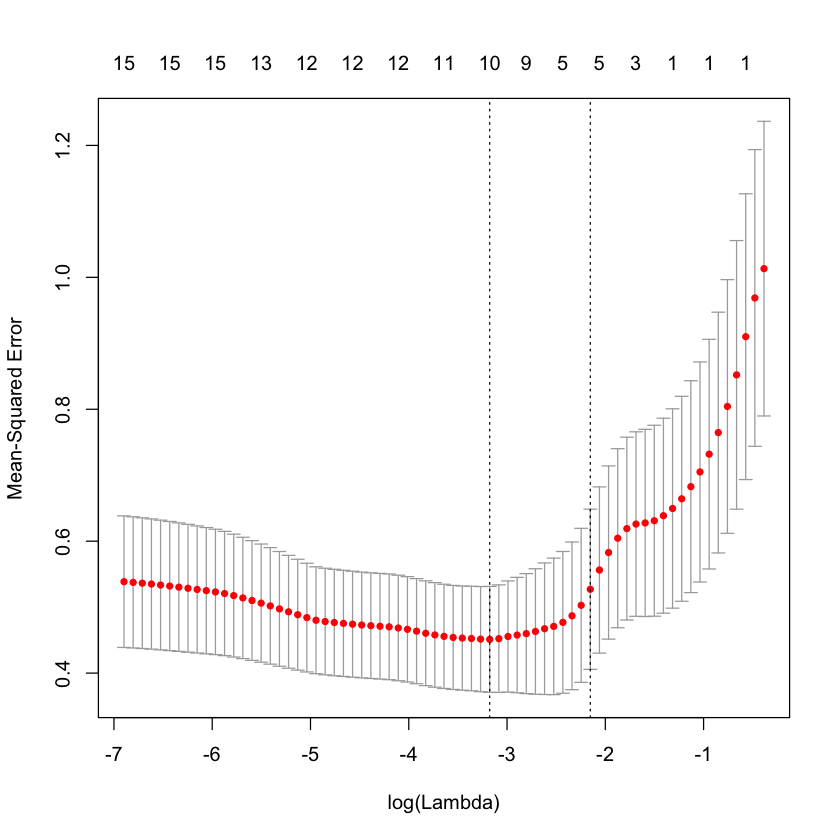

In [17]:
plot(lasso.cv)

We see that the lowest MSE among the cross-validated models is about ~0.47.  
Using this lambda, we can recreate our actual Lasso model without the cross-validation. We will use that final Lasso model and analyze it, comparing it later on with the Elastic Net model.

In [18]:
lasso <- glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=1, lambda=lambda)

### c.) ELASTIC NET REGRESSION (& Ridge)

The steps will be very similar to building a Lasso Regression model; however we need to be mindful of the regularization parameter used to create the ENet Regression. In the meantime, we might as well make a Ridge model and compare.
  
In the below example, we see that the MSE for Ridge Regression does slightly better than Lasso. Remember that this might not be very significant considering how few data observations there are.

__RIDGE__

[1] 0.4869443

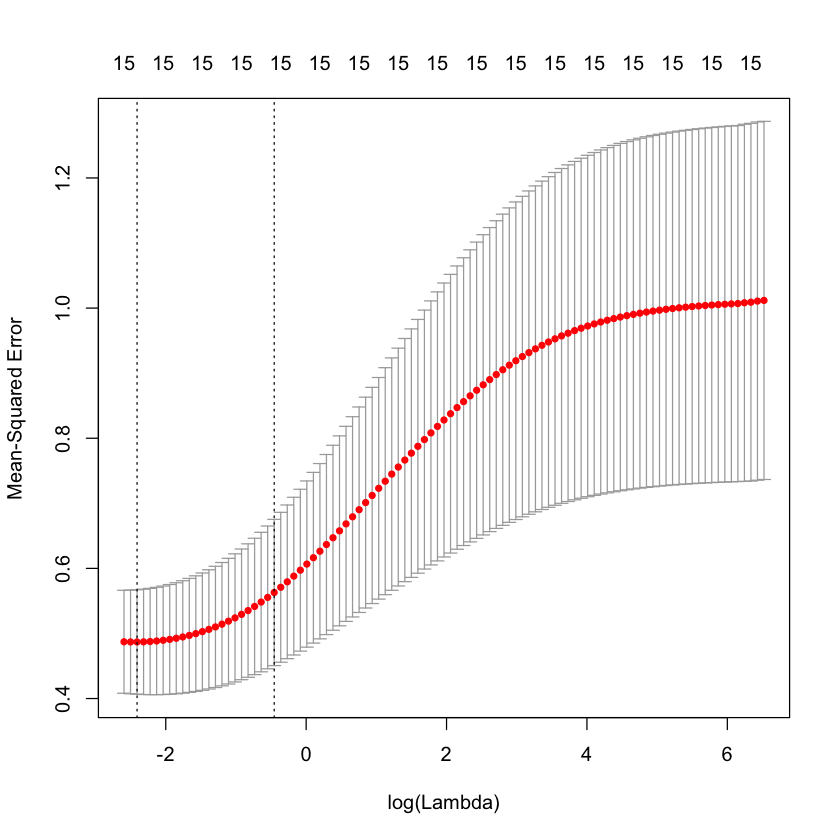

In [19]:
# Build Ridge model
ridge.cv <- cv.glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=0)
# Ridge Regression model
ridge.lambda <- ridge.cv$lambda.min

# Error using the best lambda
ridge.cv$cvm[ridge.cv$lambda == ridge.lambda]

plot(ridge.cv)

In [20]:
# Build the ridge model for later
ridge <- glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=0, lambda=ridge.lambda)

__ELASTIC NET__

Short refresher on the strategy and what we plan for the wrap up:  
  
Begin by testing various regularization parameters, build the final Elastic Net model after cross-validation, and compare it to the Lasso and Ridge models.  
When we have all of the models, we can evaluate metrics such as the R^2 values to see how they fare against one another. 

In [21]:
# Store values
c <- 20
temp.c <- vector()
temp.lambda <- vector()
temp.mse <- vector()


# Build ENet model testing out various regularization parameters
for (i in 1:c) {
    
    # Build Elastic Net model
    enet.cv <- cv.glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=i/20)
    enet.lambda <- enet.cv$lambda.min
    
    # Store c, lambda hyperparameters for later use
    temp.c[i] <- i
    temp.lambda[i] <- enet.lambda
    temp.mse[i] <- enet.cv$cvm[enet.cv$lambda == enet.lambda]
}

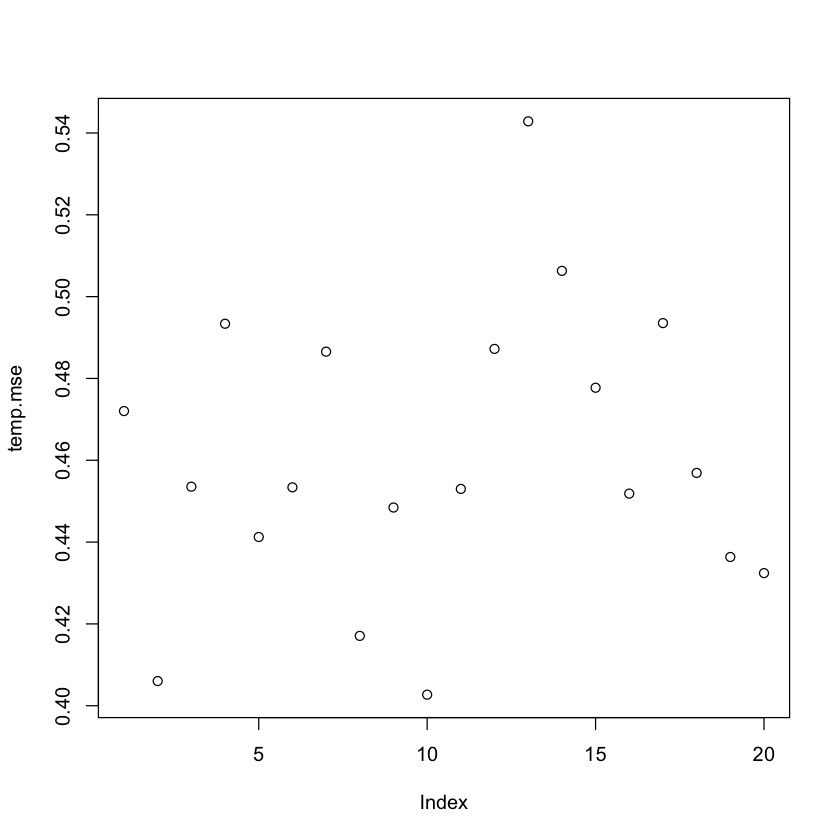

In [22]:
# Best MSE values for each cross-validation
# Would be interesting to see for larger data set maybe
plot(temp.mse)

In [23]:
# Use best regularization parameter and its best lambda value using the corresponding MSE index
index <- which(temp.mse == min(temp.mse))

C <- temp.c[index]/20
L <- temp.lambda[index]

enet <- glmnet(scale.x, scale.y, family="gaussian", standardize=TRUE, alpha=C, lambda=L)

### Final Comparisons

Since the same data set was used on all 6 of our finalized models, why not try to compare all of them?
  
By looking at the R^2 values and the Adjusted R^2, we can get an idea of how each model does in both evaluating the overfit and the generalizability. Again and as always with these small data sets, sometimes having a lower R^2 is not that meaningful. A lot of it could be due to random noise in the data, which may have larger impacts as the data set gets smaller. However, since the class is about exploring models and seeing if we can actually interpet the theoretical meaning of our model outcomes, we can try to analyze them as best as possible rather than how I always gripe about the lack of data. 
  
Another important note is thinking of this in a statistical perspective, rather than big data/ machine learning. After all, these regression methods were created long before either of the latter two terms were used as common buzzwords.

In [24]:
# Get R^2 of our glmnet models
lasso.pred <- predict(lasso, scale.x)
ridge.pred <- predict(ridge, scale.x)
enet.pred <- predict(enet, scale.x)

# Can also use model$dev.ratio, but I had built the function anyway
lasso.r2 <- get_r2(lasso.pred, scale.y)
ridge.r2 <- get_r2(ridge.pred, scale.y)
enet.r2 <- get_r2(enet.pred, scale.y)

In [25]:
# Calculate the adjusted r2 values
n <- nrow(scale.y)
lasso.r2adj <- get_r2adj(lasso.r2, n, length(coef(lasso))-1)
ridge.r2adj <- get_r2adj(ridge.r2, n, length(coef(ridge))-1)
enet.r2adj <- get_r2adj(enet.r2, n, length(coef(enet))-1)

In [26]:
# Do the same for the step based models
forward.r2 <- get_r2(predict(stepForward, uscrime[,1:15]), uscrime[,16])
both.r2 <- get_r2(predict(stepBoth, uscrime[,1:15]), uscrime[,16])
bic.r2 <- get_r2(predict(bicBoth, uscrime[,1:15]), uscrime[,16])

forward.r2adj <- get_r2adj(forward.r2, n, length(coef(stepForward))-1)
both.r2adj <- get_r2adj(both.r2, n, length(coef(stepBoth))-1)
bic.r2adj <- get_r2adj(bic.r2, n, length(coef(bicBoth))-1)

In [27]:
# Show values
df <- data.frame(c(lasso.r2, ridge.r2, enet.r2, forward.r2, both.r2, bic.r2),
                 
                 c(lasso.r2adj, ridge.r2adj, enet.r2adj, forward.r2adj, both.r2adj, bic.r2adj),
                 
                 c(length(coef(lasso)), length(coef(ridge)), length(coef(enet)), 
                   length(coef(stepForward)), length(coef(stepBoth)), length(coef(bicBoth))))
                
df[,4] <- df[,1] - df[,2]
colnames(df) <- c('R^2', 'R^2 Adjusted', '# Var', 'Diff')
rownames(df) <- c('Lasso', 'Ridge', 'ENet', 'stepForward', 'stepBoth', 'stepBIC')

df

,R^2,R^2 Adjusted,# Var,Diff
Lasso,0.7386589,0.6122035,16,0.12645539
Ridge,0.7666251,0.6537017,16,0.11292336
ENet,0.7929390,0.6927482,16,0.10019080
stepForward,0.8030868,0.7078062,16,0.09528060
stepBoth,0.7888268,0.7443692,9,0.04445752
stepBIC,0.7658663,0.7307463,7,0.03512005


While looking at the magnitude of the difference between R^2 and R^2 Adjusted values may not be a real metric, we can see how overfitting plays a role. For the Lasso, Ridge, and ENet models we have relatively 'worse' fit models to the training data, but also worse adjusted R^2 values.
  
The professor mentioned that the Lasso, Ridge, and ENet models are generally going to be stronger predictors. While this may be the case for the most part, it looks like these models do not perform as well when compared to the step based models, even after cross-validating the best parameters. 
  
My retrospective thoughts are as follows:
Since we have a high ratio of samples:variables, it makes sense that a model with the BIC criterion shows the least signs of overfitting, by looking at the Diff value. Some food for thought may be in actually getting rid of some variables for the models. We definitely see a trend of more variables leading to a larger difference in R^2 vs R^2 adjusted.